<a href="https://colab.research.google.com/github/MeAmarP/AirGesture/blob/master/keito_prob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import cv2
from google.colab.patches import cv2_imshow
print(cv2.__version__)

4.1.2


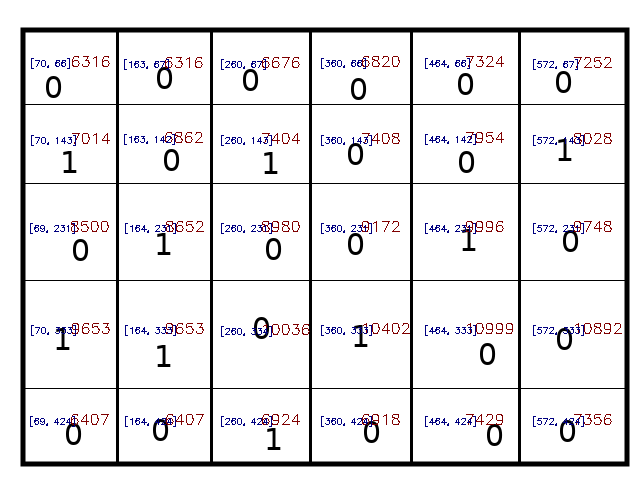

30


In [49]:
main_img = cv2.imread('/content/test.png')
gry_img = cv2.cvtColor(main_img,cv2.COLOR_BGR2GRAY)

_, _, stats, centroids = cv2.connectedComponentsWithStats(gry_img)


flats_cxcy = []
for idx,cxcy in enumerate(centroids):
  if (stats[idx,4] > 6300) and (stats[idx,4] < 11000):
    flats_cxcy.append(cxcy)

    cv2.putText(main_img,str(stats[idx,4]),(int(cxcy[0]),int(cxcy[1])),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,128))
    cv2.putText(main_img,str([int(cxcy[0]),int(cxcy[1])]),(int(cxcy[0]-40),int(cxcy[1])),cv2.FONT_HERSHEY_SIMPLEX,0.3,(128,0,))


# contours,_ = cv2.findContours(img.copy(),cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# for num,cnt in enumerate(contours):
#   x,y,w,h = cv2.boundingRect(cnt)
#   w_by_h_ratio = w/h
#   if w_by_h_ratio >=0.7:
    # cv2.putText(main_img,"*",(int(x+w/2),int(y+h/2)),cv2.FONT_HERSHEY_SIMPLEX,0.7,(0,0,128))
cv2_imshow(main_img)
print(len(flats_cxcy))


In [55]:
#Create table map with flat(0,0) mapped to imgflat(cx,cy)
#to find the flat,we need to find bbox: DONEs
import numpy as np

np_flats_cxcy = np.array(flats_cxcy)
print('before',np_flats_cxcy.shape)

print('after',np_flats_cxcy.reshape(5,6,2))

before (30, 2)
after [[[ 70.63077897  66.790057  ]
  [163.99556681  67.12634579]
  [260.86698622  67.07579389]
  [360.58240469  66.77331378]
  [464.99617695  66.98443474]
  [572.80529509  67.04440154]]

 [[ 70.01097804 143.2566296 ]
  [163.75517342 142.94972311]
  [260.39127499 143.25810373]
  [360.67143629 143.18142549]
  [464.96680915 142.96592909]
  [572.58806677 143.41292975]]

 [[ 69.71905882 231.00023529]
  [164.00889968 231.360957  ]
  [260.16837416 231.0532294 ]
  [360.63846489 231.19123419]
  [464.97408964 231.41326531]
  [572.55765285 231.28210915]]

 [[ 70.0688905  333.94064022]
  [164.00797679 333.79270693]
  [260.48545237 334.15284974]
  [360.50336474 333.96914055]
  [464.5254114  333.58159833]
  [572.68160118 333.90249725]]

 [[ 69.88512564 424.68690495]
  [164.14296863 424.8342438 ]
  [260.34734258 424.80805893]
  [360.13775658 424.77825961]
  [464.07497644 424.69820972]
  [572.67264818 424.82354541]]]
